In [1]:
# pip install alpha_vantage

In [2]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from alpha_vantage.timeseries import TimeSeries 

print("All libraries loaded")

All libraries loaded


In [1]:
from project import *

Number data points 5839 from 1999-11-01 to 2023-01-13


/var/folders/xb/ck19r6wj3s34sw5xpnr7_fbm0000gp/T/ipykernel_64746/784565489.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='y', linestyle='--')


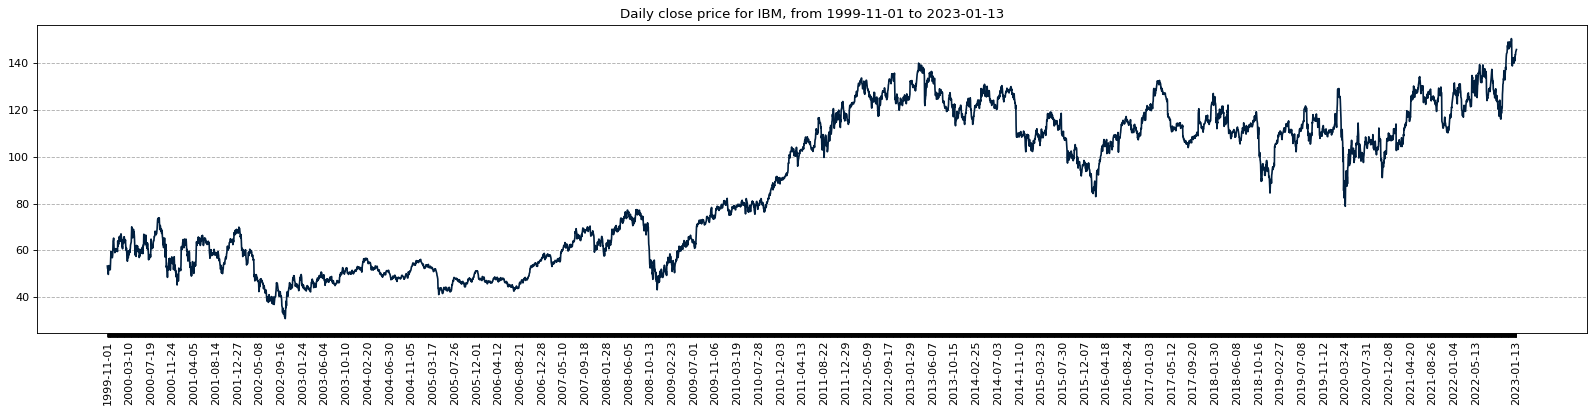

In [3]:
def download_data(config):
      ts = TimeSeries(key='O6LFU5LE4ZVYXL1H') #you can use the demo API key for this project, but please make sure to eventually get your own API key at https://www.alphavantage.co/support/#api-key. 
      data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

      data_date = [date for date in data.keys()]
      data_date.reverse()

      data_close_price = [float(data[date][config["alpha_vantage"]["key_adjusted_close"]]) for date in data.keys()]
      data_close_price.reverse()
      data_close_price = np.array(data_close_price)

      num_data_points = len(data_date)
      display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
      print("Number data points", num_data_points, display_date_range)

      return data_date, data_close_price, num_data_points, display_date_range

data_date, data_close_price, num_data_points, display_date_range = download_data(config)

# plot

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid(b=None, which='major', axis='y', linestyle='--')
plt.show()

Number data points 5839 from 1999-11-01 to 2023-01-13


/var/folders/xb/ck19r6wj3s34sw5xpnr7_fbm0000gp/T/ipykernel_64746/2590856319.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='y', linestyle='--')


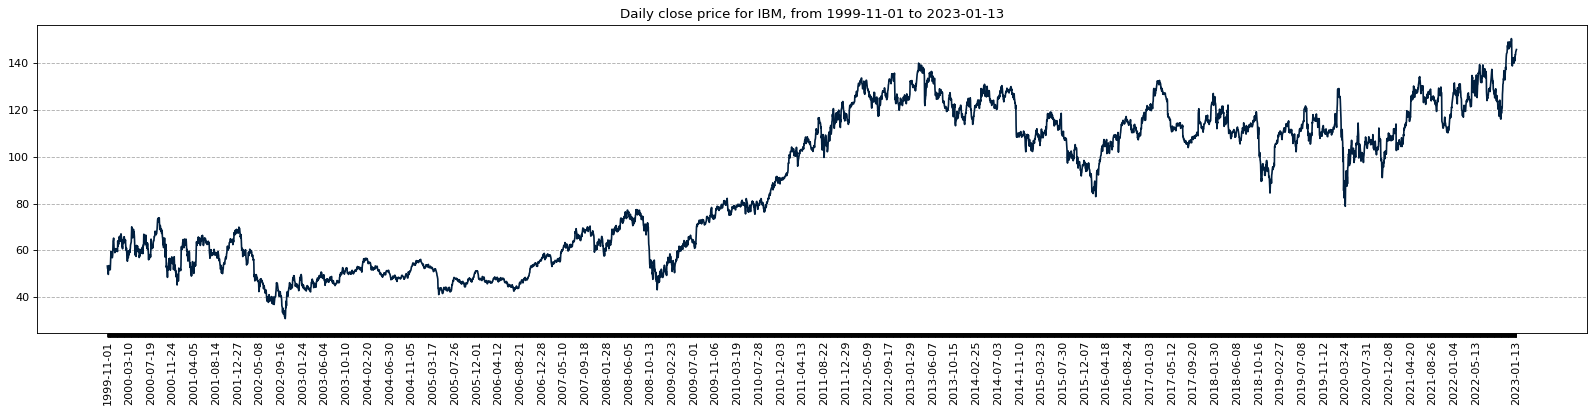

In [4]:
def download_data(config):
      ts = TimeSeries(key='O6LFU5LE4ZVYXL1H') #you can use the demo API key for this project, but please make sure to eventually get your own API key at https://www.alphavantage.co/support/#api-key. 
      data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

      data_date = [date for date in data.keys()]
      data_date.reverse()

      data_close_price = [float(data[date][config["alpha_vantage"]["key_adjusted_close"]]) for date in data.keys()]
      data_close_price.reverse()
      data_close_price = np.array(data_close_price)

      num_data_points = len(data_date)
      display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
      print("Number data points", num_data_points, display_date_range)

      return data_date, data_close_price, num_data_points, display_date_range

data_date, data_close_price, num_data_points, display_date_range = download_data(config)

# plot

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid(b=None, which='major', axis='y', linestyle='--')
plt.show()

## 单独获取数据的方式看文档：

https://www.alphavantage.co/documentation/

可以选择的内容有：

            Real GDP Trending
            Real GDP per Capita
            Treasury Yield Trending
            Federal Funds (Interest) Rate
            CPI
            Inflation
            Retail Sales
            Durable Goods Orders
            Unemployment Rate
            Nonfarm Payroll

In [20]:
api_key = 'O6LFU5LE4ZVYXL1H'

### CPI （已验证）

In [5]:
import requests

url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=O6LFU5LE4ZVYXL1H'
# 这里的CPI是 Unadjusted indexes，验证看这里：https://www.bls.gov/news.release/cpi.t01.htm
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Consumer Price Index for all Urban Consumers', 'interval': 'monthly', 'unit': 'index 1982-1984=100', 'data': [{'date': '2022-12-01', 'value': '296.797'}, {'date': '2022-11-01', 'value': '297.711'}, {'date': '2022-10-01', 'value': '298.012'}, {'date': '2022-09-01', 'value': '296.808'}, {'date': '2022-08-01', 'value': '296.171'}, {'date': '2022-07-01', 'value': '296.276'}, {'date': '2022-06-01', 'value': '296.311'}, {'date': '2022-05-01', 'value': '292.296'}, {'date': '2022-04-01', 'value': '289.109'}, {'date': '2022-03-01', 'value': '287.504'}, {'date': '2022-02-01', 'value': '283.716'}, {'date': '2022-01-01', 'value': '281.148'}, {'date': '2021-12-01', 'value': '278.802'}, {'date': '2021-11-01', 'value': '277.948'}, {'date': '2021-10-01', 'value': '276.589'}, {'date': '2021-09-01', 'value': '274.310'}, {'date': '2021-08-01', 'value': '273.567'}, {'date': '2021-07-01', 'value': '273.003'}, {'date': '2021-06-01', 'value': '271.696'}, {'date': '2021-05-01', 'value': '269.195'}, 

### inflation

In [7]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=O6LFU5LE4ZVYXL1H'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Inflation - US Consumer Prices', 'interval': 'annual', 'unit': 'percent', 'data': [{'date': '2021-01-01', 'value': '4.69785886363739'}, {'date': '2020-01-01', 'value': '1.23358439630637'}, {'date': '2019-01-01', 'value': '1.81221007526015'}, {'date': '2018-01-01', 'value': '2.44258329692818'}, {'date': '2017-01-01', 'value': '2.13011000365963'}, {'date': '2016-01-01', 'value': '1.26158320570537'}, {'date': '2015-01-01', 'value': '0.118627135552435'}, {'date': '2014-01-01', 'value': '1.62222297740821'}, {'date': '2013-01-01', 'value': '1.46483265562714'}, {'date': '2012-01-01', 'value': '2.06933726526059'}, {'date': '2011-01-01', 'value': '3.15684156862206'}, {'date': '2010-01-01', 'value': '1.64004344238989'}, {'date': '2009-01-01', 'value': '-0.35554626629975'}, {'date': '2008-01-01', 'value': '3.83910029665101'}, {'date': '2007-01-01', 'value': '2.85267248150136'}, {'date': '2006-01-01', 'value': '3.22594410070407'}, {'date': '2005-01-01', 'value': '3.39274684549547'}, {'da

### unemployment rate（已验证）

In [8]:
url = 'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=O6LFU5LE4ZVYXL1H'
#这里的unemployment是seasonally-adjusted 验证看这里：https://www.statista.com/statistics/273909/seasonally-adjusted-monthly-unemployment-rate-in-the-us/
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Unemployment Rate', 'interval': 'monthly', 'unit': 'percent', 'data': [{'date': '2022-12-01', 'value': '3.5'}, {'date': '2022-11-01', 'value': '3.6'}, {'date': '2022-10-01', 'value': '3.7'}, {'date': '2022-09-01', 'value': '3.5'}, {'date': '2022-08-01', 'value': '3.7'}, {'date': '2022-07-01', 'value': '3.5'}, {'date': '2022-06-01', 'value': '3.6'}, {'date': '2022-05-01', 'value': '3.6'}, {'date': '2022-04-01', 'value': '3.6'}, {'date': '2022-03-01', 'value': '3.6'}, {'date': '2022-02-01', 'value': '3.8'}, {'date': '2022-01-01', 'value': '4.0'}, {'date': '2021-12-01', 'value': '3.9'}, {'date': '2021-11-01', 'value': '4.2'}, {'date': '2021-10-01', 'value': '4.5'}, {'date': '2021-09-01', 'value': '4.8'}, {'date': '2021-08-01', 'value': '5.2'}, {'date': '2021-07-01', 'value': '5.4'}, {'date': '2021-06-01', 'value': '5.9'}, {'date': '2021-05-01', 'value': '5.8'}, {'date': '2021-04-01', 'value': '6.1'}, {'date': '2021-03-01', 'value': '6.1'}, {'date': '2021-02-01', 'value': '6.2'},

### find 指数/个股 （还未完成）

In [18]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=nadq&apikey=O6LFU5LE4ZVYXL1H'


r = requests.get(url)
data = r.json()

print(data)

{'bestMatches': [{'1. symbol': 'NADQ.FRK', '2. name': 'Multi Units Luxembourg- Lyxor Nasdaq-100 UCITS ETF', '3. type': 'ETF', '4. region': 'Frankfurt', '5. marketOpen': '08:00', '6. marketClose': '20:00', '7. timezone': 'UTC+02', '8. currency': 'EUR', '9. matchScore': '0.8000'}, {'1. symbol': 'NADQ.DEX', '2. name': 'Lyxor Nasdaq-100 Ucits ETF Dis', '3. type': 'ETF', '4. region': 'XETRA', '5. marketOpen': '08:00', '6. marketClose': '20:00', '7. timezone': 'UTC+02', '8. currency': 'EUR', '9. matchScore': '0.7273'}]}


In [16]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=CURN&apikey=O6LFU5LE4ZVYXL1H' 

# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=CURN&apikey=O6LFU5LE4ZVYXL1H'

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CURN&apikey=O6LFU5LE4ZVYXL1H'

# url = 'https://www.alphavantage.co/query?function=CURN&apikey=O6LFU5LE4ZVYXL1H'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'CURN', '3. Last Refreshed': '2023-01-13', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-01-13': {'1. open': '16.42', '2. high': '16.42', '3. low': '16.42', '4. close': '16.42', '5. adjusted close': '16.42', '6. volume': '55', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-01-12': {'1. open': '16.5', '2. high': '16.5', '3. low': '16.42', '4. close': '16.42', '5. adjusted close': '16.42', '6. volume': '500', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-01-11': {'1. open': '16.7', '2. high': '16.7', '3. low': '16.18', '4. close': '16.18', '5. adjusted close': '16.18', '6. volume': '300', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-01-10': {'1. open': '16.62', '2. high': '16.62', '3. low': '16.62', '4. close': '16.62', '5. adjusted close': '16.62', '6. volume': '930', '7. div

### REAL GDP (没找到相对应的数据)

In [25]:
url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey='+api_key
r = requests.get(url)
REAL_GDP = r.json()

print(REAL_GDP)

{'name': 'Real Gross Domestic Product', 'interval': 'quarterly', 'unit': 'billions of dollars', 'data': [{'date': '2022-07-01', 'value': '5018.093'}, {'date': '2022-04-01', 'value': '4985.795'}, {'date': '2022-01-01', 'value': '4855.857'}, {'date': '2021-10-01', 'value': '5110.951'}, {'date': '2021-07-01', 'value': '4916.402'}, {'date': '2021-04-01', 'value': '4890.835'}, {'date': '2021-01-01', 'value': '4691.624'}, {'date': '2020-10-01', 'value': '4843.66'}, {'date': '2020-07-01', 'value': '4701.108'}, {'date': '2020-04-01', 'value': '4335.915'}, {'date': '2020-01-01', 'value': '4628.46'}, {'date': '2019-10-01', 'value': '4901.993'}, {'date': '2019-07-01', 'value': '4796.221'}, {'date': '2019-04-01', 'value': '4753.025'}, {'date': '2019-01-01', 'value': '4584.814'}, {'date': '2018-10-01', 'value': '4772.161'}, {'date': '2018-07-01', 'value': '4689.905'}, {'date': '2018-04-01', 'value': '4646.83'}, {'date': '2018-01-01', 'value': '4500.182'}, {'date': '2017-10-01', 'value': '4668.375'}

### GDP PER CAPITA （已验证）


In [21]:
url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey='+api_key
# 验证数据：https://fred.stlouisfed.org/series/A939RX0Q048SBEA
r = requests.get(url)
REAL_GDP_PER_CAPITA = r.json()

print(REAL_GDP_PER_CAPITA)

{'name': 'Real Gross Domestic Product per Capita', 'interval': 'quarterly', 'unit': 'chained 2012 dollars', 'data': [{'date': '2022-07-01', 'value': '60181.0'}, {'date': '2022-04-01', 'value': '59756.0'}, {'date': '2022-01-01', 'value': '59877.0'}, {'date': '2021-10-01', 'value': '60154.0'}, {'date': '2021-07-01', 'value': '59202.0'}, {'date': '2021-04-01', 'value': '58864.0'}, {'date': '2021-01-01', 'value': '57889.0'}, {'date': '2020-10-01', 'value': '57005.0'}, {'date': '2020-07-01', 'value': '56484.0'}, {'date': '2020-04-01', 'value': '52394.0'}, {'date': '2020-01-01', 'value': '57279.0'}, {'date': '2019-10-01', 'value': '58017.0'}, {'date': '2019-07-01', 'value': '57845.0'}, {'date': '2019-04-01', 'value': '57418.0'}, {'date': '2019-01-01', 'value': '57100.0'}, {'date': '2018-10-01', 'value': '56851.0'}, {'date': '2018-07-01', 'value': '56831.0'}, {'date': '2018-04-01', 'value': '56512.0'}, {'date': '2018-01-01', 'value': '56195.0'}, {'date': '2017-10-01', 'value': '55877.0'}, {'d

### Federal Funds (Interest) Rate （已验证）

In [26]:
url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey='+api_key
# 已验证： https://fred.stlouisfed.org/series/FEDFUNDS
r = requests.get(url)
FEDERAL_FUNDS_RATE = r.json()

print(FEDERAL_FUNDS_RATE)

{'name': 'Effective Federal Funds Rate', 'interval': 'monthly', 'unit': 'percent', 'data': [{'date': '2022-12-01', 'value': '4.10'}, {'date': '2022-11-01', 'value': '3.78'}, {'date': '2022-10-01', 'value': '3.08'}, {'date': '2022-09-01', 'value': '2.56'}, {'date': '2022-08-01', 'value': '2.33'}, {'date': '2022-07-01', 'value': '1.68'}, {'date': '2022-06-01', 'value': '1.21'}, {'date': '2022-05-01', 'value': '0.77'}, {'date': '2022-04-01', 'value': '0.33'}, {'date': '2022-03-01', 'value': '0.20'}, {'date': '2022-02-01', 'value': '0.08'}, {'date': '2022-01-01', 'value': '0.08'}, {'date': '2021-12-01', 'value': '0.08'}, {'date': '2021-11-01', 'value': '0.08'}, {'date': '2021-10-01', 'value': '0.08'}, {'date': '2021-09-01', 'value': '0.08'}, {'date': '2021-08-01', 'value': '0.09'}, {'date': '2021-07-01', 'value': '0.10'}, {'date': '2021-06-01', 'value': '0.08'}, {'date': '2021-05-01', 'value': '0.06'}, {'date': '2021-04-01', 'value': '0.07'}, {'date': '2021-03-01', 'value': '0.07'}, {'date

### Retail Sales （已验证）

In [28]:
url = 'https://www.alphavantage.co/query?function=RETAIL_SALES&apikey='+api_key
# 已验证：https://fred.stlouisfed.org/series/RSXFSN
r = requests.get(url)
RETAIL_SALES = r.json()

print(RETAIL_SALES)

{'name': 'Advance Retail Sales: Retail Trade', 'interval': 'monthly', 'unit': 'millions of dollars', 'data': [{'date': '2022-11-01', 'value': '611784'}, {'date': '2022-10-01', 'value': '597826'}, {'date': '2022-09-01', 'value': '577370'}, {'date': '2022-08-01', 'value': '613416'}, {'date': '2022-07-01', 'value': '600746'}, {'date': '2022-06-01', 'value': '609933'}, {'date': '2022-05-01', 'value': '614474'}, {'date': '2022-04-01', 'value': '594426'}, {'date': '2022-03-01', 'value': '597077'}, {'date': '2022-02-01', 'value': '506400'}, {'date': '2022-01-01', 'value': '518146'}, {'date': '2021-12-01', 'value': '632849'}, {'date': '2021-11-01', 'value': '579687'}, {'date': '2021-10-01', 'value': '557737'}, {'date': '2021-09-01', 'value': '532840'}, {'date': '2021-08-01', 'value': '553822'}, {'date': '2021-07-01', 'value': '554845'}, {'date': '2021-06-01', 'value': '560679'}, {'date': '2021-05-01', 'value': '567461'}, {'date': '2021-04-01', 'value': '557874'}, {'date': '2021-03-01', 'value'

### Durable Goods Orders （已验证）


In [29]:
url = 'https://www.alphavantage.co/query?function=DURABLES&apikey=' + api_key
# 已验证：https://fred.stlouisfed.org/series/UMDMNO
r = requests.get(url)
Durable_Goods_Orders = r.json()

print(Durable_Goods_Orders)

{'name': 'Manufacturer New Orders: Durable Goods', 'interval': 'monthly', 'unit': 'millions of dollars', 'data': [{'date': '2022-11-01', 'value': '259588'}, {'date': '2022-10-01', 'value': '273120'}, {'date': '2022-09-01', 'value': '289932'}, {'date': '2022-08-01', 'value': '279323'}, {'date': '2022-07-01', 'value': '249456'}, {'date': '2022-06-01', 'value': '294470'}, {'date': '2022-05-01', 'value': '263971'}, {'date': '2022-04-01', 'value': '260366'}, {'date': '2022-03-01', 'value': '294088'}, {'date': '2022-02-01', 'value': '250105'}, {'date': '2022-01-01', 'value': '242492'}, {'date': '2021-12-01', 'value': '267477'}, {'date': '2021-11-01', 'value': '244327'}, {'date': '2021-10-01', 'value': '247086'}, {'date': '2021-09-01', 'value': '260121'}, {'date': '2021-08-01', 'value': '250971'}, {'date': '2021-07-01', 'value': '228559'}, {'date': '2021-06-01', 'value': '263226'}, {'date': '2021-05-01', 'value': '235324'}, {'date': '2021-04-01', 'value': '236534'}, {'date': '2021-03-01', 'va

### Nonfarm Payroll (数据不太一致)

In [30]:
url = 'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&apikey='+ api_key
r = requests.get(url)
NONFARM_PAYROLL = r.json()

print(NONFARM_PAYROLL)

{'name': 'Total Nonfarm Payroll', 'interval': 'monthly', 'unit': 'thousands of persons', 'data': [{'date': '2022-12-01', 'value': '154771'}, {'date': '2022-11-01', 'value': '155015'}, {'date': '2022-10-01', 'value': '154401'}, {'date': '2022-09-01', 'value': '153204'}, {'date': '2022-08-01', 'value': '152674'}, {'date': '2022-07-01', 'value': '152258'}, {'date': '2022-06-01', 'value': '152607'}, {'date': '2022-05-01', 'value': '151728'}, {'date': '2022-04-01', 'value': '150957'}, {'date': '2022-03-01', 'value': '149905'}, {'date': '2022-02-01', 'value': '149143'}, {'date': '2022-01-01', 'value': '147505'}, {'date': '2021-12-01', 'value': '150352'}, {'date': '2021-11-01', 'value': '150210'}, {'date': '2021-10-01', 'value': '149310'}, {'date': '2021-09-01', 'value': '147651'}, {'date': '2021-08-01', 'value': '146947'}, {'date': '2021-07-01', 'value': '146452'}, {'date': '2021-06-01', 'value': '146493'}, {'date': '2021-05-01', 'value': '145304'}, {'date': '2021-04-01', 'value': '144358'},

# 1